In [1]:
from instruments_recognition.importing_data import *
from instruments_recognition.plotting import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
### IMPORTING SYNTHETIC SINUSOIDS calls

        
algunos = [gimme_sinusoids_noise(500,[.8,.4,.8,.8,.6,.5,.1,.1]),
          gimme_sinusoids(400,[.5,.3,.4,.5,.6,.7,.1,.1])]
namos = ['500','400']

# more global variables
ex_transformed, freq_label = list(zip(*map(transform_floats, algunos)))
names_and_graphs = list(zip(namos, ex_transformed, freq_label))



#plt.plot(ex_transformed[0])
#plt.show()


In [6]:
### IMPORTING DATA calls


# global variables
# directory with data
#datadirectory = "./samples/sonatina_symphonic_orchestra/Samples/Flute/"
datadirectory = "./samples/flute/philharmonia/LA4/"

# maximum of examples
max_ex = 1

# channels
# TODO: do not hardcode this!
channels = 1

# file names
ex_wav = glob.glob(datadirectory + '*.wav')[:max_ex]

# TODO: a human-readble version of ex_wav
# ex_names = 


# more global variables
# just with release
ex_transformed, freq_label = list(zip(*map(lambda e : import_convert_transform_release(e,channels), ex_wav)))
names_and_graphs = list(zip(ex_wav, ex_transformed, freq_label))

# attack and release
# todo

In [7]:
### FINDING HARMONICS calls


#harmonic_volumes_every_example = [ harmonics_frequency_volumes(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]
#harmonic_number_volumes_every_example = [ cast_harmonics(f,v) for f,v in harmonic_volumes_every_example ]
harmonic_number_volumes_every_example = [ harmonics_energy_compatibility(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]
harmonic_number_volumes_every_example = [ harmonics_energy(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]


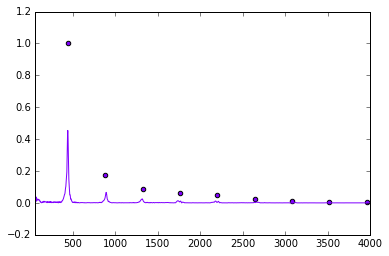

In [8]:
### PLOTTING calls

# get data
#names_and_graphs_and_harm = zip(names_and_graphs, harmonic_volumes_every_example)
names_and_graphs_and_harm_number = list(zip(names_and_graphs, harmonic_number_volumes_every_example))

# plot

minfreq_plot = 60
maxfreq_plot = 4000

#plotharmonics_nc(names_and_graphs_and_harm_number)
#plotharmonics(names_and_graphs_and_harm_number)
#plotharmonics2(names_and_graphs_and_harm_number)
plotspec_and_harmonics(names_and_graphs_and_harm_number)

#plt.legend(loc='upper right')
#plt.yscale('log')
plt.xlim([minfreq_plot,maxfreq_plot])
plt.show()

#plt.plot([0,1,2])
#plt.show()

In [1]:
### testing audio cropper

from instruments_recognition.signal_processing import *
#%pylab inline


#datadirectory = "./samples/flute/philharmonia/" 
datadirectory = "./samples/long/flute/" 

limit_examples = 10
wav_files = glob.glob(datadirectory + '*.wav')[:limit_examples]


long_wav = wav_files[0]


print("Importing signal...")
audio_long = FSignal.from_wav_file_and_clean(long_wav)
print("Cropping just some seconds...")
audio = audio_long.from_to_sec(120,300)
##print("Computing local volume...")
##local_volume = audio.local_volume()

##print("Finding beats...")
##beats = audio.find_beats(20)
##beats_beginning = [ b for b,e in beats ]
##beats_end = [ e for b,e in beats ]

#print("Plotting...")
#plt.plot(audio.fsignal)
#plt.scatter(beats_beginning, [1 for e in beats_beginning])
#plt.show()
#
#plt.plot(local_volume.fsignal)
#plt.scatter(beats_beginning, [20 for e in beats_beginning])
#plt.scatter(beats_end, [20 for e in beats_end], color='green')
#plt.show()

print("Cropping...")
cropped_audios = audio.auto_crop(20)

savedirectory = "./samples/long/cropped_experiment/" 
for crop_au in cropped_audios :
    #plt.plot(crop_au.fsignal)
    #plt.show()
    crop_au.to_wav_file(savedirectory)

print("Finished")

Importing signal...
Cropping just some seconds...
Cropping...
Finished


Importing signal...
Cropping just some seconds...
Computing local volume...
Finding beats...
Finding tempo...
computing tempo on 18 beats


<IPython.core.display.Javascript object>


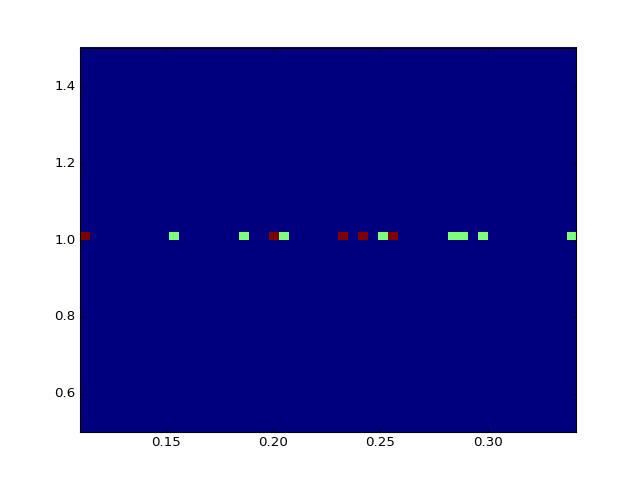

first approximation of tempo is: 264.359139451
The tempo is: 0.113481985387
Plotting...


<IPython.core.display.Javascript object>


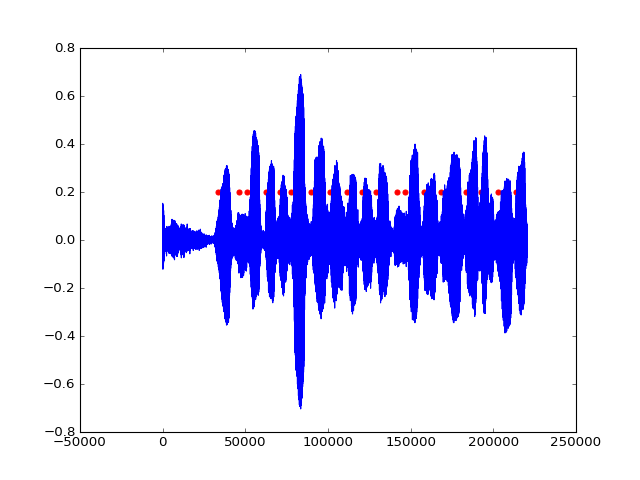

<IPython.core.display.Javascript object>


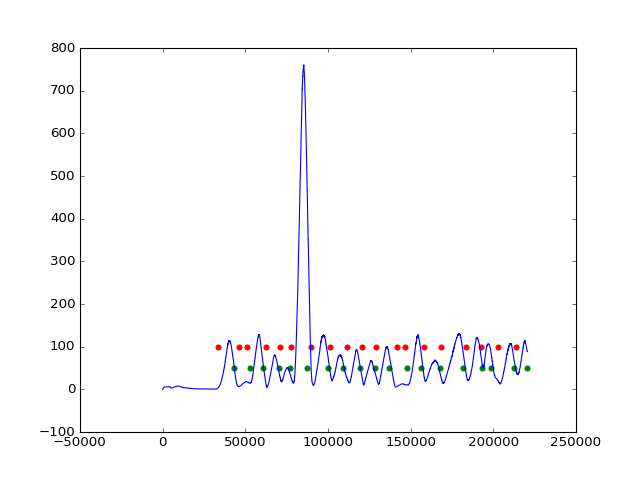

Finished


In [4]:
### testing beat finder 

%matplotlib notebook
from instruments_recognition.signal_processing import *


datadirectory = "./samples/long/flute/" 
#datadirectory = "./samples/long/songs/" 

limit_examples = 10
wav_files = glob.glob(datadirectory + '*.wav')[:limit_examples]


long_wav = wav_files[0]


print("Importing signal...")
audio_long = FSignal.from_wav_file_and_clean(long_wav)
print("Cropping just some seconds...")
audio = audio_long.from_to_sec(20,25)
print("Computing local volume...")
local_volume = audio.local_volume()


threshold = 10

print("Finding beats...")
beats = audio.find_beats(threshold)
beats_beginning = [ b for b,e in beats ]
beats_end = [ e for b,e in beats ]

print("Finding tempo...")
tempo = audio.tempo()
print("The tempo is: " + str(tempo))

print("Plotting...")
wheretodrawit = 0.2
fig, axes = plt.subplots()
axes.plot(audio.fsignal)
axes.scatter(beats_beginning, [wheretodrawit for e in beats_beginning], color='red')
#plt.show()

wheretodrawit = 100
fig, axes = plt.subplots()
axes.plot(local_volume.fsignal)
axes.scatter(beats_beginning, [wheretodrawit for e in beats_beginning], color='red')
axes.scatter(beats_end, [wheretodrawit/2 for e in beats_end], color='green')
#plt.show()

#print("Cropping...")
#cropped_audios = audio.auto_crop(20)
#
#savedirectory = "./samples/long/cropped_experiment/" 
#for crop_au in cropped_audios :
#    #plt.plot(crop_au.fsignal)
#    #plt.show()
#    crop_au.to_wav_file(savedirectory)

print("Finished")

In [4]:
a = np.array([0,1,2])
a[1:3] - a[0:2]

a[1:1]

array([], dtype=int64)

In [1]:
### Constant Q transform


ex_floats = list(map(lambda e : import_convert_release(e,channels), ex_wav))


# Constant Q Transform
def cqt(frame):
    """
    Compute the Constant Q Transform (CQT)
    """
    N = len(frame)
    print("size of cqt: " + str(N))
    y = array(zeros(N))
    a = sqrt(2 / float(N))
    for k in range(N):
         for n in range(N):
            y[k] += frame[n] * cos(pi * (2 * n + 1) * k / float(2 * N))

            if k == 0:
                y[k] = y[k] * sqrt(1 / float(N))
            else:
                y[k] = y[k] * a
    return y


signal = ex_floats[0]

fouriel = abs(np.fft.rfft(signal))
cqtr = cqt(signal[:10000])


plt.plot(cqtr)
plt.show()

NameError: name 'ex_wav' is not defined